In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ROOT_DIR = "../data/laks/scope/kmeans_72_filtered_25_loh"
NUM_SOLUTIONS = 9

In [21]:
import sys
sys.path.append("..")

In [22]:
from src.solve_ilp_2 import solve_cncff
from src.phylogeny_utils import *

In [58]:
G_or = pd.read_csv(f"{ROOT_DIR}/solution_0/G.csv", index_col=0)
G_or.columns = G_or.columns.astype(int)
G_or = G_or.astype(int)

for solution in range(1, NUM_SOLUTIONS):
    G = pd.read_csv(f"{ROOT_DIR}/solution_{solution}/G.csv", index_col=0)
    G.columns = G.columns.astype(int)
    G = G.astype(int)

    G_or = G_or | G


In [59]:
G_or

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
A,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,1
B,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1
C,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1
D,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1
E,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1
F,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1
G,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
H,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
I,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [60]:
clonal_relations = np.zeros(shape=(NUM_SOLUTIONS, 7), dtype=int)

for solution in range(NUM_SOLUTIONS):

    B = pd.read_csv(f"{ROOT_DIR}/solution_{solution}/B.csv", index_col=0)
    X = pd.read_csv(f"{ROOT_DIR}/solution_{solution}/X.csv", index_col=0)
    G = pd.read_csv(f"{ROOT_DIR}/solution_{solution}/G.csv", index_col=0)

    B.columns = B.columns.astype(int)
    G.columns = G.columns.astype(int)

    solT_mut, _ = generate_perfect_phylogeny(B)
    T = add_clusters_to_clonal_T(solT_mut, X, G, B)

    has_A_10 = T.has_successor('CN_A', 10)
    has_B_7 = T.has_successor('CN_B', 7)
    has_B_10 = T.has_successor('CN_B', 10)
    has_C_5 = T.has_successor('CN_C', 5)
    has_E_4 = T.has_successor('CN_E', 4)
    has_G_0 = T.has_successor('CN_G', 0)
    has_H_0 = T.has_successor('CN_H', 0)

    clonal_relations[solution, 0] = has_A_10
    clonal_relations[solution, 1] = has_B_7
    clonal_relations[solution, 2] = has_B_10
    clonal_relations[solution, 3] = has_C_5
    clonal_relations[solution, 4] = has_E_4
    clonal_relations[solution, 5] = has_G_0
    clonal_relations[solution, 6] = has_H_0


In [61]:
clonal_relations

array([[0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1]])

In [54]:
df = pd.DataFrame(clonal_relations,
                  index=[f'T{i+1}' for i in range(NUM_SOLUTIONS)],
                  columns=["A->S3(10)", "B->S3(10)", "B->S2(7)", "G->S9(0)", "H->S9(0)"])

df

ValueError: Shape of passed values is (9, 6), indices imply (9, 5)

/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

<Figure size 2100x1200 with 0 Axes>

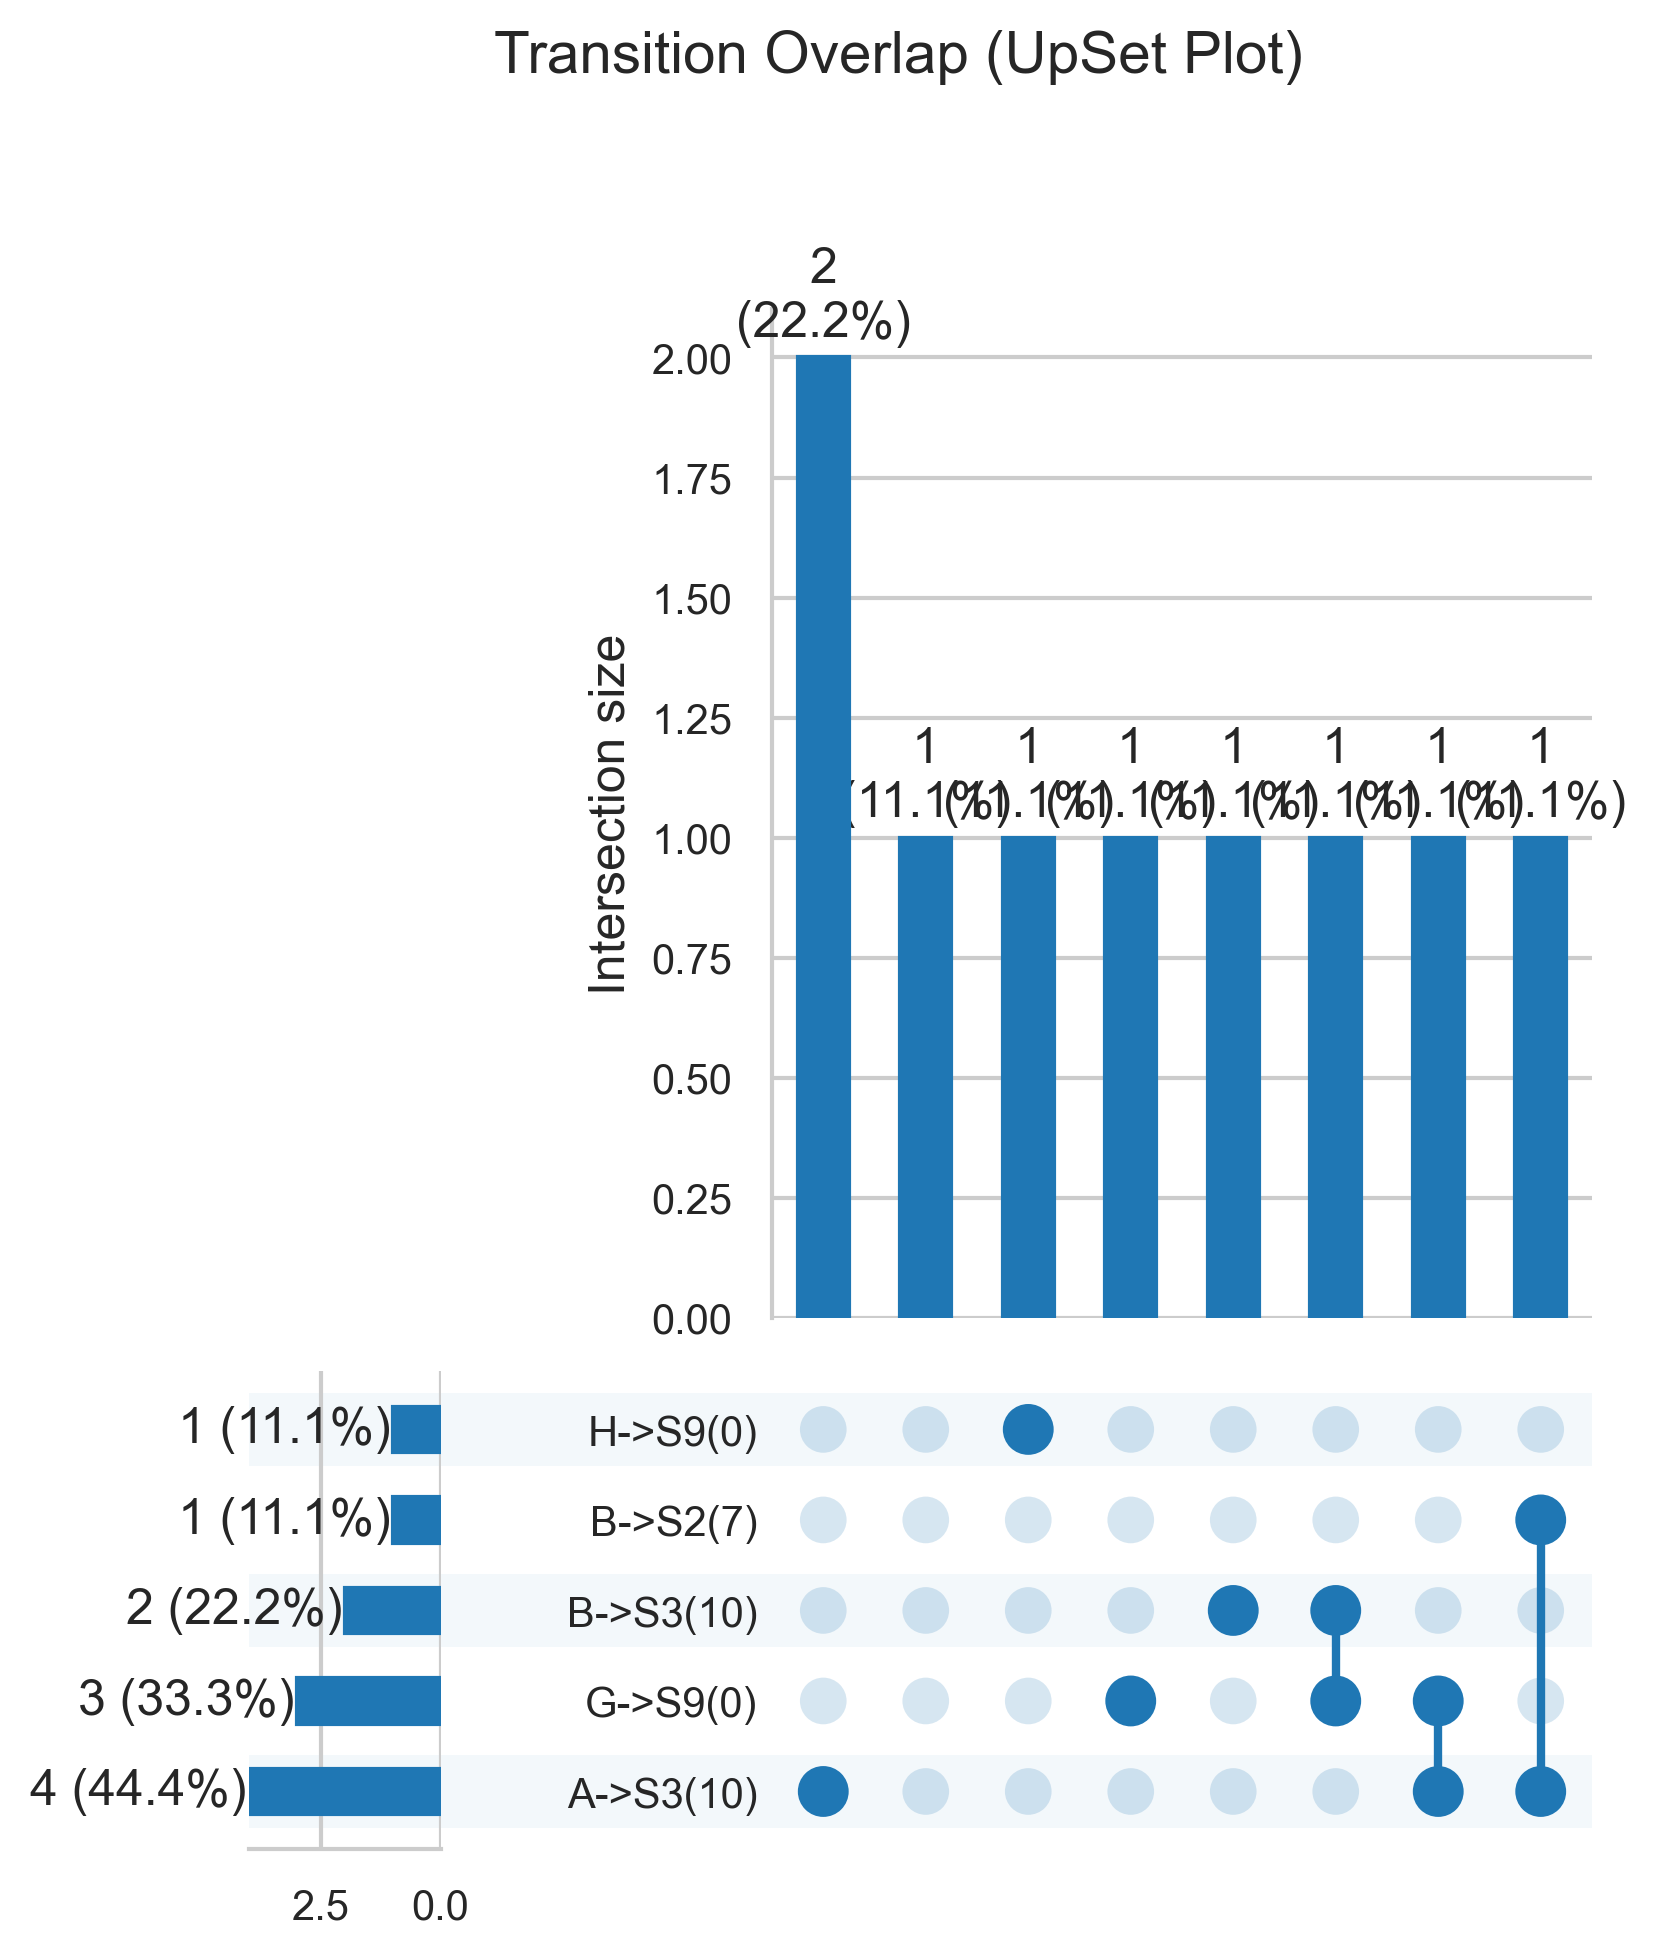

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

# -------------------------------
# 1️⃣ Your Data
# -------------------------------
df = pd.DataFrame({
    "A->S3(10)": [0,0,1,0,0,1,1,1,0],
    "B->S3(10)": [0,0,0,1,1,0,0,0,0],
    "B->S2(7)":  [0,0,0,0,0,0,0,1,0],
    "G->S9(0)":  [1,0,0,0,1,0,1,0,0],
    "H->S9(0)":  [0,0,0,0,0,0,0,0,1]
}, index=["T1","T2","T3","T4","T5","T6","T7","T8","T9"])

# -------------------------------
# 2️⃣ Collapse duplicates for UpSet
# -------------------------------
# Convert to boolean
df_bool = df.astype(bool)

# from_indicators returns a Series (counts per combination)
upset_data = from_indicators(df_bool).groupby(level=list(range(df_bool.shape[1]))).size()

# -------------------------------
# 3️⃣ Styling for publication
# -------------------------------
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.linewidth": 1.0,
    "lines.linewidth": 1.0,
    "figure.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# -------------------------------
# 4️⃣ UpSet Plot
# -------------------------------
plt.figure(figsize=(7, 4))

upset = UpSet(
    upset_data,
    sort_by='cardinality',
    show_counts='%d',
    show_percentages=True,
    facecolor="tab:blue",
    intersection_plot_elements=10,
    min_subset_size=1,
)

upset.plot()
plt.suptitle("Transition Overlap (UpSet Plot)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

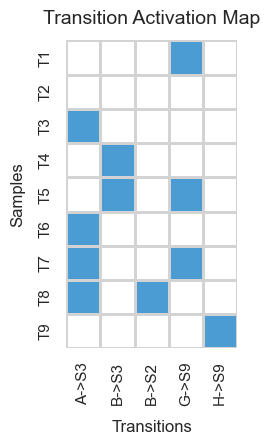

In [43]:
# Matplotlib / Seaborn aesthetic settings
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.linewidth": 0.8,
    "lines.linewidth": 1,
})

# Create the figure
fig, ax = plt.subplots(figsize=(6, 4))

# Heatmap (binary colors)
sns.heatmap(
    df,
    cmap=["#ffffff", "#4B9CD3"],   # white for 0, blue for 1
    cbar=False,
    linewidths=0.8,
    linecolor="lightgray",
    square=True,
    ax=ax
)

# Labels and aesthetics
ax.set_xlabel("Transitions", labelpad=10)
ax.set_ylabel("Samples", labelpad=10)
ax.set_title("Transition Activation Map", pad=12)

# Clean ticks
ax.tick_params(axis='x', rotation=45, ha='right')
ax.tick_params(axis='y', rotation=0)

# Remove outer box for publication look
sns.despine(fig, left=True, bottom=True)

plt.tight_layout()
plt.savefig("transition_heatmap.svg", bbox_inches="tight", pad_inches=0.1)
plt.show()

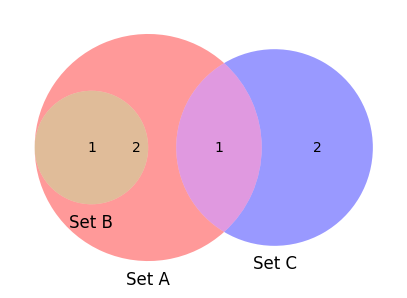

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# Your matrix
mat = clonal_relations

# Convert to sets of element indices
sets = [set(np.where(row == 1)[0]) for row in mat]

# Plot
plt.figure(figsize=(5, 5))
venn3(sets, set_labels=('Set A', 'Set B', 'Set C'))
plt.show()

In [ ]:

has_A_10, has_B_7, has_E_4, has_G_0

(False, False, True, True)